<a href="https://colab.research.google.com/github/Chinhan1532/AI_Class/blob/main/AI_W11_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


so hinh la: [2]


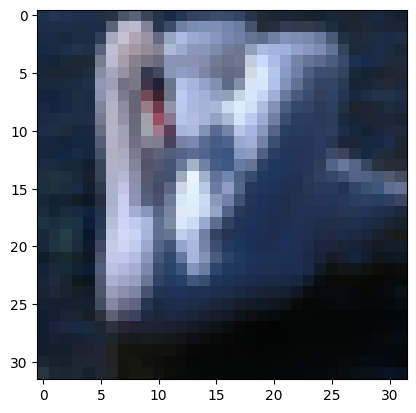

In [3]:
digit=x_train[1532]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
print('so hinh la:',y_train[1532])

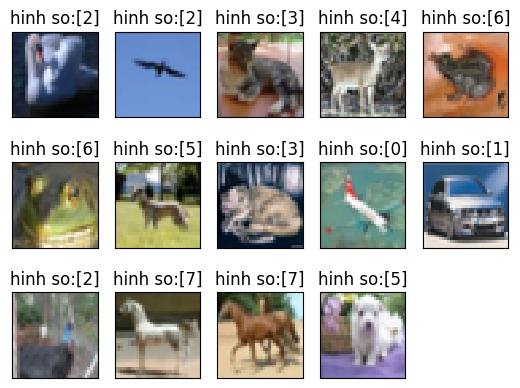

In [4]:
for i in range(14):
   plt.subplot(3,5,i+1)
   plt.tight_layout
   plt.imshow(x_train[i+1532],cmap='gray',interpolation='none')
   plt.title( 'hinh so:{}'.format(y_train[i+1532]))
   plt.xticks([])
   plt.yticks([])

In [5]:
x_train= x_train.astype('float32')/255
x_test= x_test.astype('float32')/255
from keras.utils import to_categorical    #to_categorical: chuyển từ 1 bit thành nhiều bit đầu ra 
y_train = to_categorical(y_train,10)  #từ 1 bit thành 10 bit
y_test = to_categorical(y_test,10)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [7]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU, Activation
from keras.optimizers import Adam, SGD
batch_size=64
epochs=20
classes=10

In [9]:
from keras.layers.regularization.dropout import Dropout
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(32,32,3),padding='same')) # 32: số lần tích chập, kernel_size: kích thước tích chập
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [13]:
from keras.utils.sidecar_evaluator import optimizer
from keras.losses import categorical_crossentropy
sgd=SGD(lr=0.1,decay= 1e-6,momentum = 0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])
train=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
782/782 [==============================] - 16s 7ms/step - loss: 2.1708 - accuracy: 0.1885
Epoch 2/20
782/782 [==============================] - 5s 7ms/step - loss: 1.9735 - accuracy: 0.2805
Epoch 3/20
782/782 [==============================] - 5s 7ms/step - loss: 1.8185 - accuracy: 0.3401
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 1.6930 - accuracy: 0.3804
Epoch 5/20
782/782 [==============================] - 6s 7ms/step - loss: 1.6110 - accuracy: 0.4122
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 1.5316 - accuracy: 0.4433
Epoch 7/20
782/782 [==============================] - 5s 7ms/step - loss: 1.4598 - accuracy: 0.4706
Epoch 8/20
782/782 [==============================] - 6s 7ms/step - loss: 1.3936 - accuracy: 0.4969
Epoch 9/20
782/782 [==============================] - 5s 7ms/step - loss: 1.3470 - accuracy: 0.5136
Epoch 10/20
782/782 [==============================] - 6s 7ms/step - loss: 1.3066 - accuracy: 0.531

In [14]:
model.save('model2.h5')

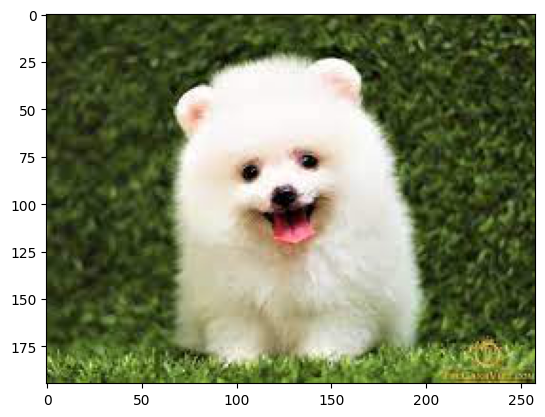

In [27]:
img=plt.imread('/content/cho1.jpg')
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 23ms/step
5
Label:  dog


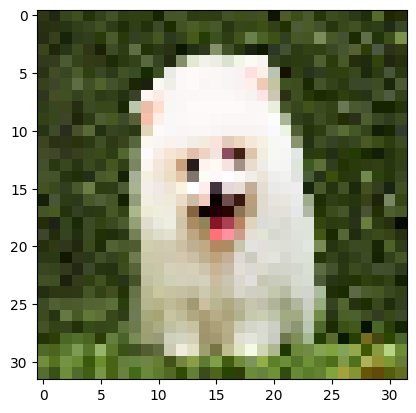

In [28]:
from keras.utils import load_img, img_to_array
img = load_img("/content/cho1.jpg", target_size=(32,32))
plt.imshow(img)
import numpy as np
img = img_to_array(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32')
img = img/255

matrix= np.argmax(model.predict(img), axis = -1)

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
temp = matrix[0]
print(temp)
print("Label: ", classes[temp])